# Simple linear regression

Linear regression is used to predict values but not categories. In this case we try to find the correlation between the area of a house and its price in a dataset of houses sold in Sacramento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../data/sacramentorealestatetransactions.csv',usecols=['sq__ft', 'price'])

In [3]:
# See the database before doing anything
df.set_index('sq__ft')
df.head()

,sq__ft,price
0,836,59222
1,1167,68212
2,796,68880
3,852,69307
4,797,81900


In [4]:
# The number of columns and rows
df.shape

(985, 2)

In [5]:
df.describe()

,sq__ft,price
count,985.000000,985.000000
mean,1314.916751,234144.263959
std,853.048243,138365.839085
min,0.000000,1551.000000
25%,952.000000,145000.000000
50%,1304.000000,213750.000000
75%,1718.000000,300000.000000
max,5822.000000,884790.000000


In [6]:
# Find missing data
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 2 columns):
sq__ft    985 non-null int64
price     985 non-null int64
dtypes: int64(2)
memory usage: 15.5 KB


In [9]:
# Find the correlation
df.corr()['sq__ft'].sort_values()

price     0.333897
sq__ft    1.000000
Name: sq__ft, dtype: float64

Something is not right since the price and the area doesn't seem to correlate

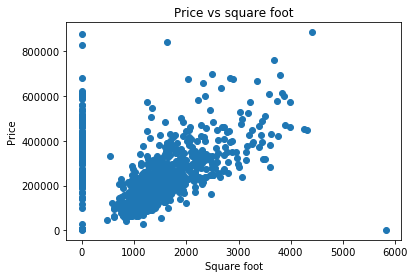

In [72]:
plt.plot(df['sq__ft'], df['price'], 'o')
plt.ylabel('Price')
plt.xlabel('Square foot')
plt.title('Price vs square foot')

In [11]:
# Remove outliers
filtered_data = df[(df.sq__ft > 10) & (df.sq__ft < 5000)]

In [12]:
filtered_data.describe()

,sq__ft,price
count,813.000000,813.000000
mean,1585.942189,229728.134071
std,647.423526,119633.032607
min,484.000000,30000.000000
25%,1144.000000,148750.000000
50%,1418.000000,208000.000000
75%,1851.000000,285000.000000
max,4400.000000,884790.000000


In [13]:
filtered_data.corr()['sq__ft'].sort_values()

price     0.728642
sq__ft    1.000000
Name: sq__ft, dtype: float64

The correlation is much higher now that I have removed the outliers

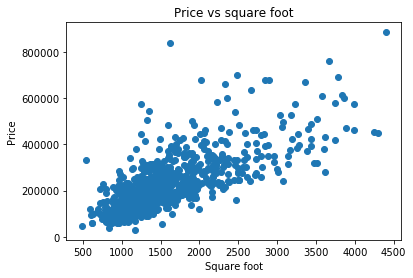

In [14]:
plt.plot(filtered_data['sq__ft'], filtered_data['price'], 'o')
plt.ylabel('Price')
plt.xlabel('Square foot')
plt.title('Price vs square foot')

In [15]:
# Import the libraries for the machine learning
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn import cross_validation

Using TensorFlow backend.
C:\Users\Yossi\Anaconda3\envs\ztdl\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
model = Sequential()

# Convert the value from the input (square foot) to the output (price)
# The model receives 1 input and outputs a single value
model.add(Dense(1, input_shape=(1,)))

# We expect the model to be linear
model.add(Activation('linear'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Adam optimizer with learning rate of 10 (After some triabl and error I find it to be the best learning rate)
model.compile(Adam(lr=10), loss='mean_squared_error', metrics=['mse', 'accuracy'])

In [20]:
X = filtered_data[['sq__ft']].values

In [21]:
y = filtered_data['price'].values

In [25]:
# Split the data to test and train group
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
# The EarlyStopping callback stops the learning process if the loss doesn't improve
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=2,
                   verbose=2,
                   mode='auto')

In [27]:
# The training in which tensorflow finds the optimal parameters is done here
model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=200,
          validation_data=(X_test,y_test),
          callbacks=[es])

Train on 609 samples, validate on 204 samples
Epoch 1/200
609/609 [==============================] - 0s - loss: 26118779334.8309 - mean_squared_error: 26118779334.8309 - acc: 0.0000e+00 - val_loss: 8341255082.6667 - val_mean_squared_error: 8341255082.6667 - val_acc: 0.0000e+00
Epoch 2/200
609/609 [==============================] - 0s - loss: 8223499804.1642 - mean_squared_error: 8223499804.1642 - acc: 0.0000e+00 - val_loss: 7728606905.7255 - val_mean_squared_error: 7728606905.7255 - val_acc: 0.0000e+00
Epoch 3/200
609/609 [==============================] - 0s - loss: 6632649541.1757 - mean_squared_error: 6632649541.1757 - acc: 0.0000e+00 - val_loss: 7454985271.2157 - val_mean_squared_error: 7454985271.2157 - val_acc: 0.0000e+00
Epoch 4/200
609/609 [==============================] - 0s - loss: 6564098181.6749 - mean_squared_error: 6564098181.6749 - acc: 0.0000e+00 - val_loss: 7572240865.8824 - val_mean_squared_error: 7572240865.8824 - val_acc: 0.0000e+00
Epoch 5/200
609/609 [===========

In [29]:
# Calculate the predicterd values from the model
y_pred = model.predict(X)

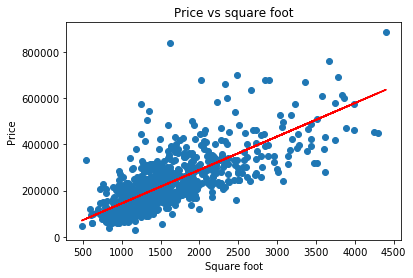

In [30]:
plt.plot(filtered_data['sq__ft'], filtered_data['price'], 'o')
plt.ylabel('Price')
plt.xlabel('Square foot')
plt.title('Price vs square foot')
plt.plot(X,y_pred,color='red')

In [31]:
# Print the parameters that the process found
W, B = model.get_weights()

In [32]:
# Weight is the slope of the line
W

array([[ 144.62713623]], dtype=float32)

In [33]:
# The bias is the point at which the line crosses the y-axis
B

array([ 158.30099487], dtype=float32)

# Summary
The method of finding linear regression with machine learning is an obvious overshoot but it allows us to learn the basics 
on a simple model. 
The power and beauty of machine learning comes from solving complex questions that involves multiple inputs and outputs.